In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
df = pd.read_parquet('/Users/julianeoliveira/Downloads/aesop_2025_09_12_mun.parquet')

In [7]:
df[['co_ibge','year_week','prob_gro_trend_ivas','prob_gro_trend_arbov','P_growth_otc_ivas',
 'P_growth_aps_ivas']]

,co_ibge,year_week,prob_gro_trend_ivas,prob_gro_trend_arbov,P_growth_otc_ivas,P_growth_aps_ivas
0,110001,2017-01,NaN,NaN,NaN,NaN
1,110001,2017-02,NaN,NaN,NaN,NaN
2,110001,2017-03,NaN,NaN,NaN,NaN
3,110001,2017-04,NaN,NaN,NaN,NaN
4,110001,2017-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2523205,530010,2025-32,0.02125,0.02750,-70775.04,-8739.0
2523206,530010,2025-33,0.06975,0.13975,-75924.42,-311.0
2523207,530010,2025-34,0.01675,0.70350,NaN,-266.0
2523208,530010,2025-35,0.00250,0.74850,NaN,-354.0


In [52]:
set_muni = df[df.co_ibge == 110001]

In [88]:
set_muni.nm_municipio

0      Alta Floresta D'Oeste
1      Alta Floresta D'Oeste
2      Alta Floresta D'Oeste
3      Alta Floresta D'Oeste
4      Alta Floresta D'Oeste
               ...          
448    Alta Floresta D'Oeste
449    Alta Floresta D'Oeste
450    Alta Floresta D'Oeste
451    Alta Floresta D'Oeste
452    Alta Floresta D'Oeste
Name: nm_municipio, Length: 453, dtype: object

In [90]:
dta = set_muni[['year_week','atend_ivas','prob_gro_trend_ivas', 'P_growth_aps_ivas']][-52:]

<ipython-input-72-44f524f0bcfe>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


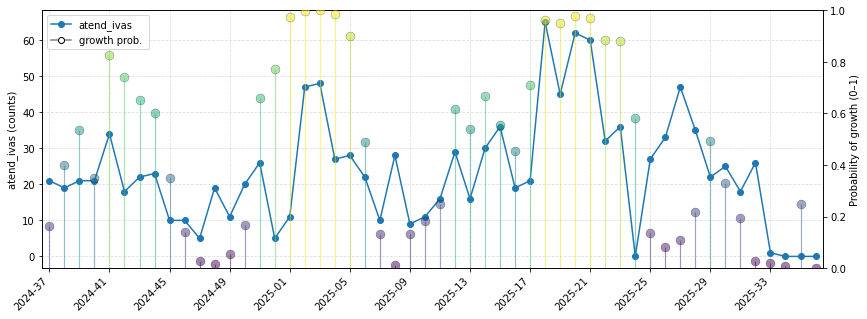

In [72]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# --- assume dta is already your DataFrame ---
# dta = pd.read_csv(...)  # or however you have it

# numeric x positions so both axes line up exactly
x = list(range(len(dta)))

# colormap + normalization for probabilities 0-1
cmap = cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=1)
colors = [cmap(norm(p)) for p in dta["prob_gro_trend_ivas"]]

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.25)

# --- Top plot: counts + probability lollipops on secondary (0-1) axis ---
ax0 = fig.add_subplot(gs[0])

# atend_ivas on primary y-axis
ln_counts = ax0.plot(x, dta["atend_ivas"], marker="o", linestyle="-",
                     color="tab:blue", label="atend_ivas", zorder=2)
ax0.set_ylabel("atend_ivas (counts)")
ax0.set_xlim(-0.5, len(dta)-0.5)
ax0.grid(True, linestyle="--", alpha=0.4)

# x-ticks as year_week labels (every 4 weeks to avoid crowding)
tick_pos = list(range(0, len(dta), 4))
ax0.set_xticks(tick_pos)
ax0.set_xticklabels(dta["year_week"].iloc[::4], rotation=45, ha="right")

# secondary axis for probability (0-1)
axp = ax0.twinx()
axp.set_ylim(0, 1)  # probability scale

# draw lollipop stems and bullets on secondary axis using numeric x
stem_lw = 1.2
bullet_size = 80
for xi, prob, col in zip(x, dta["prob_gro_trend_ivas"], colors):
    axp.vlines(xi, ymin=0, ymax=prob, color=col, linewidth=stem_lw, alpha=0.5, zorder=3)
    axp.scatter(xi, prob,alpha=0.5, color=col, edgecolor="k", linewidth=0.4,
                s=bullet_size, zorder=4)

axp.set_ylabel("Probability of growth (0–1)")

# custom legend
legend_handles = [
    Line2D([0], [0], color="tab:blue", marker="o", label="atend_ivas"),
    Line2D([0], [0], color="gray", marker="o", markerfacecolor="w",
           markeredgecolor="k", label="growth prob. ")
]
ax0.legend(handles=legend_handles, loc="upper left")



plt.tight_layout()
plt.show()


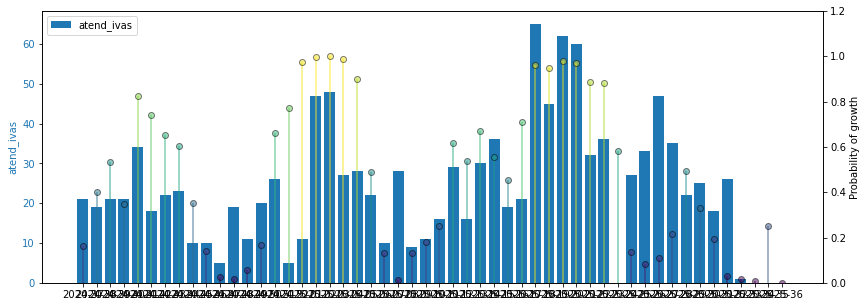

In [91]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax1 = plt.subplots(figsize=(14, 5))

# Bar plot for atend_ivas
ax1.bar(dta["year_week"], dta["atend_ivas"], 
        color="tab:blue", label="atend_ivas")
ax1.set_ylabel("atend_ivas", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Second axis for probability of growth
ax2 = ax1.twinx()

colors = cm.viridis(dta["prob_gro_trend_ivas"])  # color intensity by probability
for x, y, c in zip(dta["year_week"], dta["prob_gro_trend_ivas"], colors):
    ax2.vlines(x, 0, y, color=c, alpha=0.6)   # stem
    ax2.scatter(x, y, alpha=0.5, color=c, edgecolor="k", zorder=3)  # bullet
    
ax2.grid(True, axis="x", linestyle="--")  # vertical grid on prob plot    
ax2.set_ylabel("Probability of growth", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(0, 1.2)

# Add gridlines
#ax1.grid(False)  # remove default grid from the bar plot


# Add legend
ax1.legend(loc="upper left")

#plt.title("Weekly atend_ivas (bar plot) with growth probability (lollipop)")
plt.show()


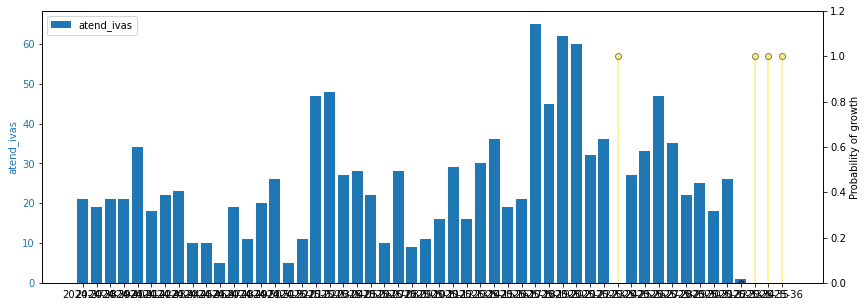

In [92]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax1 = plt.subplots(figsize=(14, 5))

# Bar plot for atend_ivas
ax1.bar(dta["year_week"], dta["atend_ivas"], 
        color="tab:blue", label="atend_ivas")
ax1.set_ylabel("atend_ivas", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Second axis for probability of growth
ax2 = ax1.twinx()

colors = cm.viridis(dta["P_growth_aps_ivas"])  # color intensity by probability
for x, y, c in zip(dta["year_week"], dta["P_growth_aps_ivas"], colors):
    ax2.vlines(x, 0, y, color=c, alpha=0.6)   # stem
    ax2.scatter(x, y, alpha=0.5, color=c, edgecolor="k", zorder=3)  # bullet
    
ax2.grid(True, axis="x", linestyle="--")  # vertical grid on prob plot    
ax2.set_ylabel("Probability of growth", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(0, 1.2)

# Add gridlines
#ax1.grid(False)  # remove default grid from the bar plot


# Add legend
ax1.legend(loc="upper left")

#plt.title("Weekly atend_ivas (bar plot) with growth probability (lollipop)")
plt.show()


In [33]:
sinal = df[['co_ibge','year_week','sinal_aesop_ivas','sinal_ens_ivas','sinal_otc_ivas','Aviso AESOP','dqi']]

In [34]:
sinal.sinal_otc_ivas.sum()

275622.0

In [35]:
sinal[sinal.year_week == '2025-36'].sinal_otc_ivas.sum()

61.0

In [36]:
sinal[sinal.year_week == '2025-36'].sinal_ens_ivas.sum()

1600.0

In [40]:
sinal[(sinal.year_week == '2025-36')]['dqi'].value_counts()

Não Apto    4712
Apto         858
Name: dqi, dtype: int64

In [42]:
sinal[(sinal.year_week == '2025-36') & (sinal.dqi == 'Apto')].sinal_ens_ivas.sum()

40.0

In [24]:
sinal[sinal.year_week == '2025-36'].sinal_aesop_ivas.sum()

101

In [27]:
sinal[sinal.year_week == '2025-36']['Aviso AESOP'].sum()

101

In [51]:
sinal[(sinal.year_week == '2025-36') & ((sinal.sinal_otc_ivas == 1) | ((sinal.sinal_ens_ivas == 1) & (sinal.dqi == 'Apto')))]

,co_ibge,year_week,sinal_aesop_ivas,sinal_ens_ivas,sinal_otc_ivas,Aviso AESOP,dqi
47111,130195,2025-36,1,0.0,1.0,1,Não Apto
63872,140017,2025-36,1,0.0,1.0,1,Não Apto
117779,150650,2025-36,1,0.0,1.0,1,Não Apto
177122,171395,2025-36,1,0.0,1.0,1,Apto
196601,172020,2025-36,1,0.0,1.0,1,Não Apto
...,...,...,...,...,...,...,...
2366924,510370,2025-36,1,1.0,1.0,1,Não Apto
2376437,510530,2025-36,1,0.0,1.0,1,Não Apto
2388215,510645,2025-36,1,0.0,1.0,1,Apto
2429891,520396,2025-36,1,0.0,1.0,1,Não Apto


In [4]:
df.columns.to_list()

['co_ibge',
 'epiyear',
 'epiweek',
 'atend_totais',
 'atend_ivas',
 'atend_arbov',
 'atend_diarreicas',
 'atend_0a11',
 'year_week',
 'epidemi_cal_start',
 'epidemi_cal_end',
 'year_week_ts',
 'co_uf',
 'nm_uf',
 'co_ibge7',
 'nm_municipio',
 'sigla_uf',
 'co_reg_saude',
 'nm_reg_saude',
 'ra_atend_ivas',
 'ra_atend_ivas_ma',
 'gr_ra_atend_ivas_ma',
 'ma_atend_ivas_indicators',
 'ra_atend_arbov',
 'ra_atend_arbov_ma',
 'gr_ra_atend_arbov_ma',
 'ma_atend_arbov_indicators',
 'P_growth_otc_ivas',
 'P_growth_aps_ivas',
 'sinal_evi_ivas',
 'lim_esp_evi_ivas',
 'sinal_evi_arbov',
 'lim_esp_evi_arbov',
 'sinal_ears_ivas',
 'lim_esp_ears_ivas',
 'prob_gro_trend_ivas',
 'sinal_ears_arbov',
 'lim_esp_ears_arbov',
 'sinal_mmaing_ivas',
 'lim_esp_mmaing_ivas',
 'prob_gro_trend_arbov',
 'dqi',
 'perc_missing',
 'perc_completude',
 'diff_2w',
 'diff_3w',
 'sum_miss',
 'completude',
 'tempestividade',
 'sinal_mmaing_arbov',
 'lim_esp_mmaing_arbov',
 'exc_evi_ivas',
 'exc_evi_arbov',
 'exc_ears_ivas'